## Author : Ibrahim Sobh
## Time Series Analysis 
## Air Passengers dataset

### Importing Libraries & Loading Data

In [85]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= (15,5)
airPassengers_master=pd.read_csv('../data/AirPassengers.csv',parse_dates=["Month"],index_col=["Month"])
airPassengers_data = airPassengers_master.copy()



## Air passengers

### Display Dataset

In [86]:
airPassengers_data.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

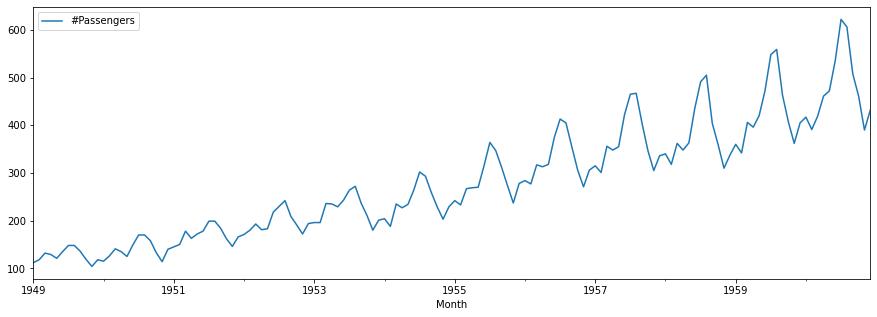

In [87]:
airPassengers_data.plot()

### Describe Dataset

In [88]:
airPassengers_data.describe(include=np.number)

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### Check up for columns with missing Data

In [89]:
airPassengers_data.isnull().sum().sort_values(ascending=False).head(10) / len(airPassengers_data) *100

#Passengers    0.0
dtype: float64

In [90]:
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices

airPassengers_data = airPassengers_data.dropna()


In [91]:
from statsmodels.tsa.stattools import adfuller

#p value is the probability value of obtaining the observed results assuming null hypothesis is True
#The lower the p-value, the greater the statistical significance of the observed difference.
# since it is higher here, we reject the null hypothsis and the time series is non-stationary

X = airPassengers_data['#Passengers']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


## Ratings Data

<AxesSubplot:xlabel='Month'>

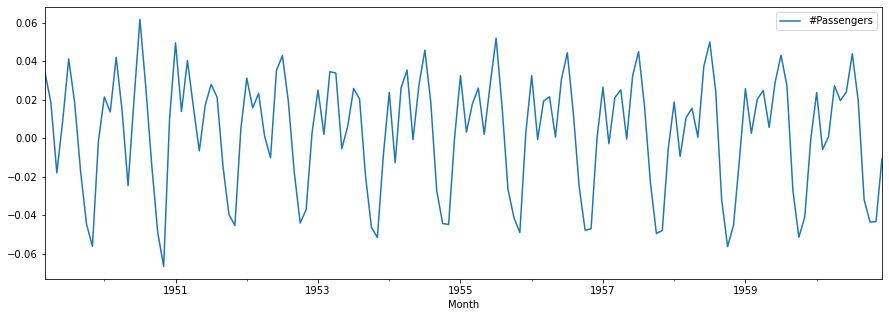

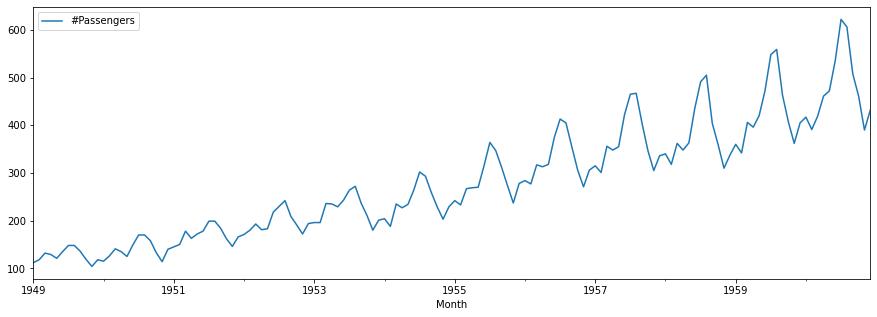

In [94]:
airPassengers_data_transf= airPassengers_data.copy()
airPassengers_data_transf["#Passengers"] = np.log(np.log(airPassengers_data_transf["#Passengers"])).diff(2).dropna()
airPassengers_data_transf.dropna(inplace=True)
airPassengers_data_transf.plot()
airPassengers_data.plot()

In [95]:
X = airPassengers_data_transf['#Passengers']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -3.022979
p-value: 0.032803
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
airPassengers_data_transf.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,1.791759
1949-03-01,2.639057
1949-04-01,NaN
1949-05-01,NaN


<AxesSubplot:xlabel='Month'>

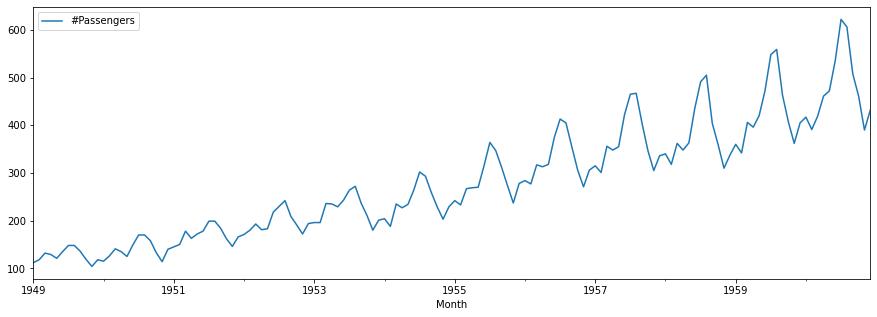

In [ ]:
airPassengers_data.plot()

* ### No missing data were founb thus we dont need to delete anythign

### Drop Unwanted Columns ( columns with a lot of missing data)

In [ ]:
ratings_data.drop(["timestamp"], axis = 1, inplace = True)

In [ ]:
ratings_data.head(5)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
ratings_data["rating"].describe(include=np.number)


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [ ]:
duplicate_mask =ratings_data.duplicated(keep=False,subset=["userId","movieId"])
ratings_data[duplicate_mask]

,userId,movieId,rating


In [ ]:
ratings_data.groupby(by=["movieId","rating"], dropna=False).count()

userId
movieId rating        
1       0.5          1
        1.5          1
        2.0          6
        2.5          8
        3.0         34
...                ...
193581  4.0          1
193583  3.5          1
193585  3.5          1
193587  3.5          1
193609  4.0          1

[30417 rows x 1 columns]